# Лабораторная работа 1
## 6408 Дробин Роман
## Вариант 2

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
#Импорт необходимых библиотек и методов
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics
import time
from statistics import mode
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report #Для методов оценок качества классификации
from sklearn.model_selection import train_test_split #Для распределения данных на обучающие и тестовые выборки
from sklearn.model_selection import StratifiedKFold #Для метода кросс-валидации
from random import randrange

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 3) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

_random_state = 322

### 1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
#Подгружаем данные рукописных цифр
digits = load_digits()

### 1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.

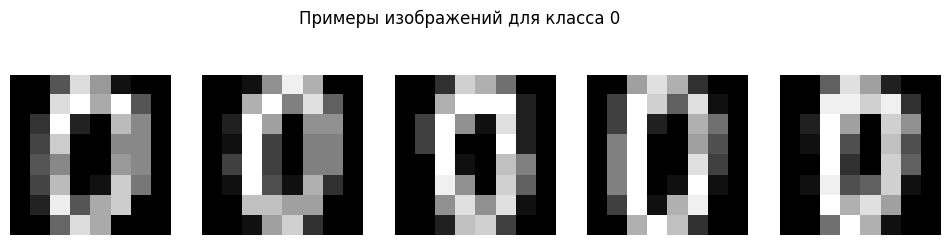

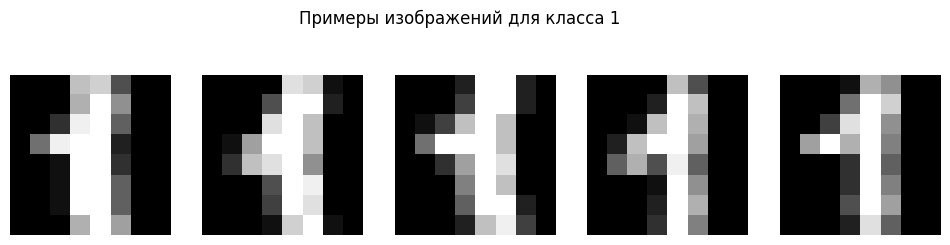

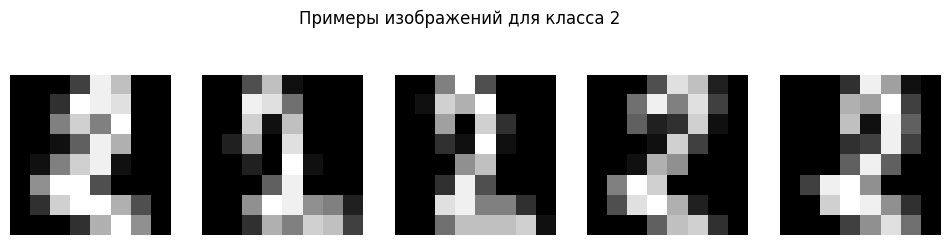

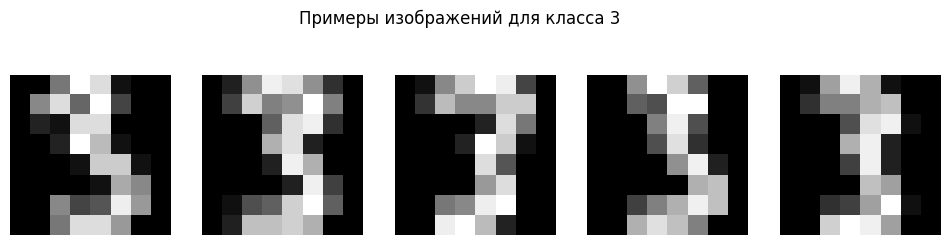

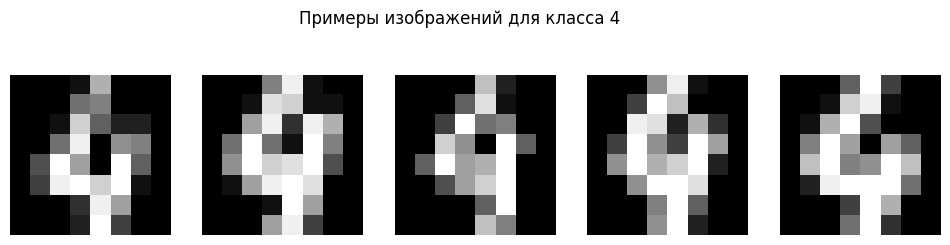

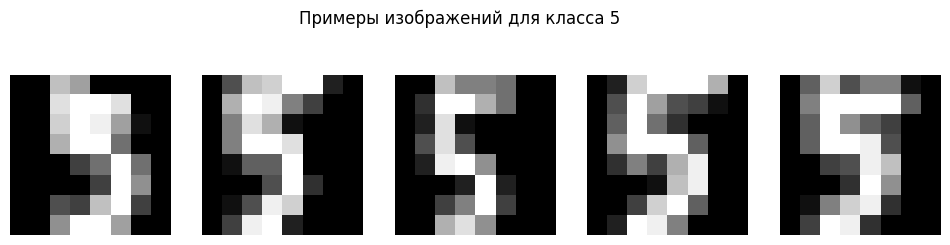

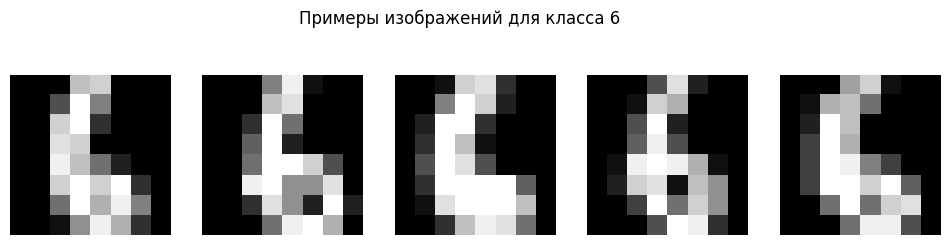

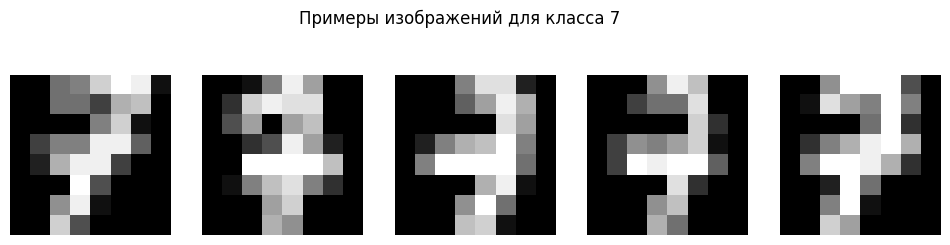

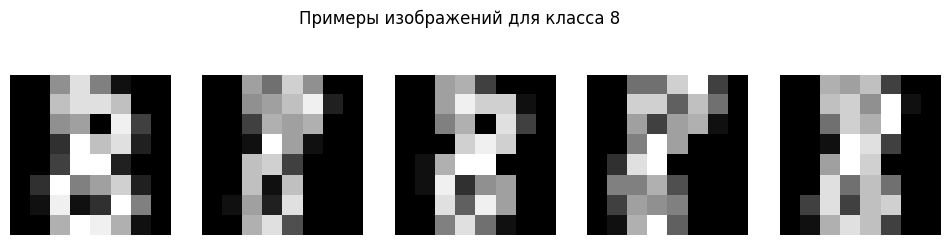

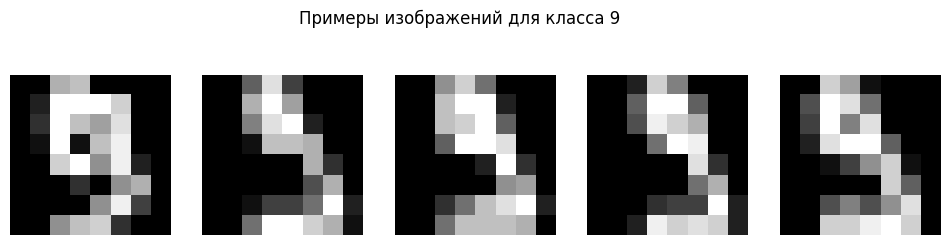

In [3]:
data = digits.data #Признаки
targets = digits.target #Метки классов
number_of_classes = len(set(targets)) #Число классов

#Словарь, в котором ключ - метка класса, а значение - список индексов изображений, соответствующих этой метке
target_dict = {i: np.where(targets == i)[0] for i in range(number_of_classes)}

#Выводим по 5 примеров для каждого класса
for target in target_dict:
    fig, axes = plt.subplots(1, 5)
    fig.suptitle(f"Примеры изображений для класса {target}")
    for i, image_index in enumerate(target_dict[target][:5]):
        axes[i].imshow(data[image_index].reshape(8, 8))
        axes[i].axis('off')
    plt.show()

### 1.3 Разделите данные на обучающую и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [4]:
#Разделение данных на обучающую и тестовую выборки
#test_size = 0.2 - указывает, что примерно 20% данных будут выделены в тестовую выборку
#random_state = 322 - задает начальное значение (seed) для генератора случайных чисел
#shuffle = True - данные будут перемешаны перед разделением
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=_random_state, shuffle=True)

print("Размеры обучающей выборки:", X_train.shape)
print("Размеры тестовой выборки:", X_test.shape)

Размеры обучающей выборки: (1437, 64)
Размеры тестовой выборки: (360, 64)


### 1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [5]:
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def train(self, X, y):
        """
        Train the classifier. For k-nearest neighbors this is just
        memorizing the training data.

        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
        """
        Predict labels for test data using this classifier.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - num_loops: Determines which implementation to use to compute distances
          between training points and testing points.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        if num_loops == 0:
            self.dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            self.dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            self.dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)

        return self.predict_labels(self.dists, k=k)

    def compute_distances_two_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a nested loop over both the training data and the
        test data.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data.

        Returns:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          is the Euclidean distance between the ith test point and the jth training
          point.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]. You should   #
                # not use a loop over dimension, nor use np.linalg.norm().          #
                #####################################################################
                # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
                dists[i, j] = np.sqrt(np.sum((X[i] - self.X_train[j]) ** 2))
                # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_one_loop(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using a single loop over the test data.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            # Do not use np.linalg.norm().                                        #
            #######################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            dists[i, :] = np.sqrt(np.sum((X[i] - self.X_train) ** 2, axis=1))
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        #                                                                       #
        # You should implement this function using only basic array operations; #
        # in particular you should not use functions from scipy,                #
        # nor use np.linalg.norm().                                             #
        #                                                                       #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.                                         #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        x2 = np.sum(X ** 2, axis=1).reshape((num_test, 1))
        x_train2 = np.sum(self.X_train ** 2, axis=1).reshape((1, num_train))
        xx_train = X.dot(self.X_train.T)
        dists = np.sqrt(x2 + x_train2 - 2 * xx_train)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def predict_labels(self, dists, k=1):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.

        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            #########################################################################
            # TODO:                                                                 #
            # Use the distance matrix to find the k nearest neighbors of the ith    #
            # testing point, and use self.y_train to find the labels of these       #
            # neighbors. Store these labels in closest_y.                           #
            # Hint: Look up the function numpy.argsort.                             #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            closest_y = list(self.y_train[np.argsort(dists[i])[:k]])
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            #########################################################################
            # TODO:                                                                 #
            # Now that you have found the labels of the k nearest neighbors, you    #
            # need to find the most common label in the list closest_y of labels.   #
            # Store this label in y_pred[i]. Break ties by choosing the smaller     #
            # label.                                                                #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            y_pred[i] = mode(closest_y)
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return y_pred

### 1.5 Выполните классификацию на тестовой выборке

In [6]:
classifier = KNearestNeighbor()
# Обучение классификатора с помощью матрицы обучающих данных X_train и вектора меток y_train
classifier.train(X_train, y_train)

In [7]:
# Предсказание меток для тестовых данных с использованием классификатора
y_pred_0 = classifier.predict(X_test) #без циклов
distances_0 = classifier.dists[:20,:20] #Матрица расстояний (первые 30 x 30 элементов)
y_pred_1 = classifier.predict(X_test, num_loops=1) #1 цикл
distances_1 = classifier.dists[:20,:20]
y_pred_2 = classifier.predict(X_test, num_loops=2) #2 цикла
distances_2 = classifier.dists[:20,:20]
print(distances_0[:5,:5])
print(distances_1[:5,:5])
print(distances_2[:5,:5])
print(y_pred_0[:10])
print(y_pred_1[:10])
print(y_pred_2[:10])

[[44.27188724 36.138622   55.57877293 55.68662317 61.68468205]
 [46.74398357 49.56813493 27.23967694 40.98780306 47.6235236 ]
 [50.14977567 54.41507144 39.7743636  42.33202098 51.63332257]
 [50.02999101 58.19793811 42.14261501 39.89987469 44.09081537]
 [60.15812497 55.09083408 44.76605857 46.32493929 64.23394741]]
[[44.27188724 36.138622   55.57877293 55.68662317 61.68468205]
 [46.74398357 49.56813493 27.23967694 40.98780306 47.6235236 ]
 [50.14977567 54.41507144 39.7743636  42.33202098 51.63332257]
 [50.02999101 58.19793811 42.14261501 39.89987469 44.09081537]
 [60.15812497 55.09083408 44.76605857 46.32493929 64.23394741]]
[[44.27188724 36.138622   55.57877293 55.68662317 61.68468205]
 [46.74398357 49.56813493 27.23967694 40.98780306 47.6235236 ]
 [50.14977567 54.41507144 39.7743636  42.33202098 51.63332257]
 [50.02999101 58.19793811 42.14261501 39.89987469 44.09081537]
 [60.15812497 55.09083408 44.76605857 46.32493929 64.23394741]]
[2. 9. 0. 9. 6. 0. 9. 9. 4. 2.]
[2. 9. 0. 9. 6. 0. 9

### 1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


In [8]:
#Визуализируем матрицу расстояний
def draw(distances, loops_param):
    plt.figure(figsize=(8, 6))
    plt.imshow(distances, cmap='viridis', aspect='auto')
    plt.colorbar(label='Расстояние')
    plt.xlabel('Обучающие примеры')
    plt.ylabel('Тестовые примеры')
    plt.title(f'Матрица расстояний между изображениями из тестовой и обучающей выборок для функции compute_distances_{loops_param}')
    plt.show()

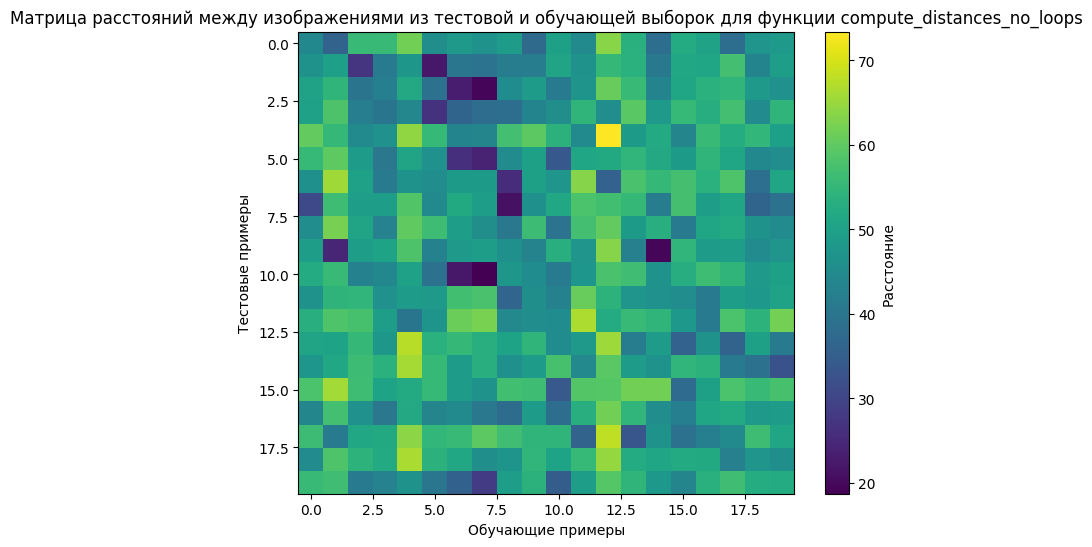

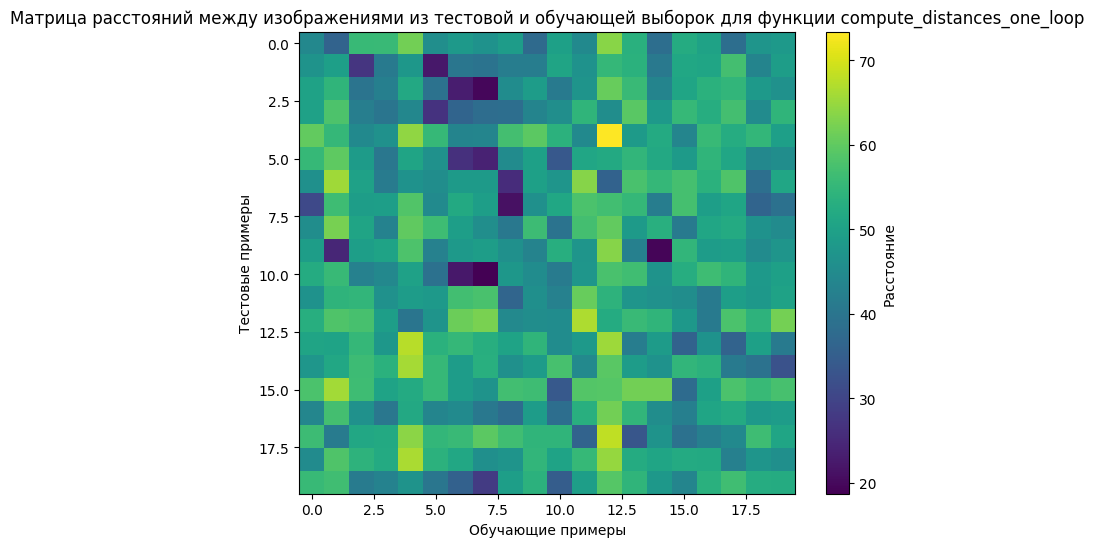

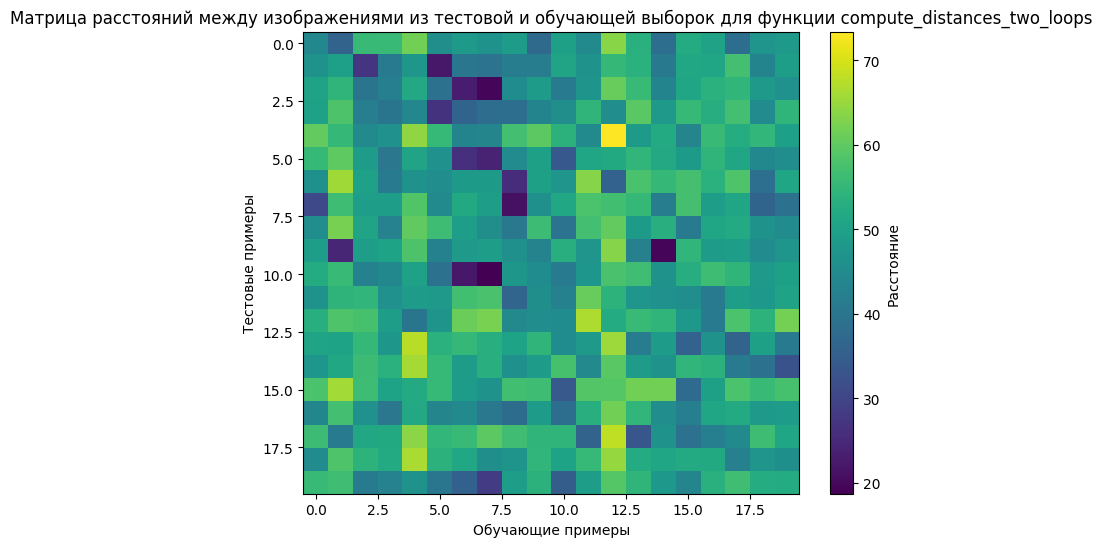

In [9]:
draw(distances_0, 'no_loops')
draw(distances_1, 'one_loop')
draw(distances_2, 'two_loops')

### 1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.

In [11]:
y_pred = y_pred_0
#Вычисление и вывод метрик оценки качества классификации
print(f'Accuracy: {accuracy_score(y_test, y_pred)}') #Точность
print(f'Precision: {precision_score(y_test, y_pred, average = "macro")}') #Точность с усреднением по классам
print(f'Recall: {recall_score(y_test, y_pred, average = "macro")}') #Полнота с усреднением по классам
print(f'F1: {f1_score(y_test, y_pred, average = "macro")}') #F1-мера с усреднением по классам

Accuracy: 0.9861111111111112
Precision: 0.9863562568146609
Recall: 0.9865929363747078
F1: 0.9862177754632133


### 1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

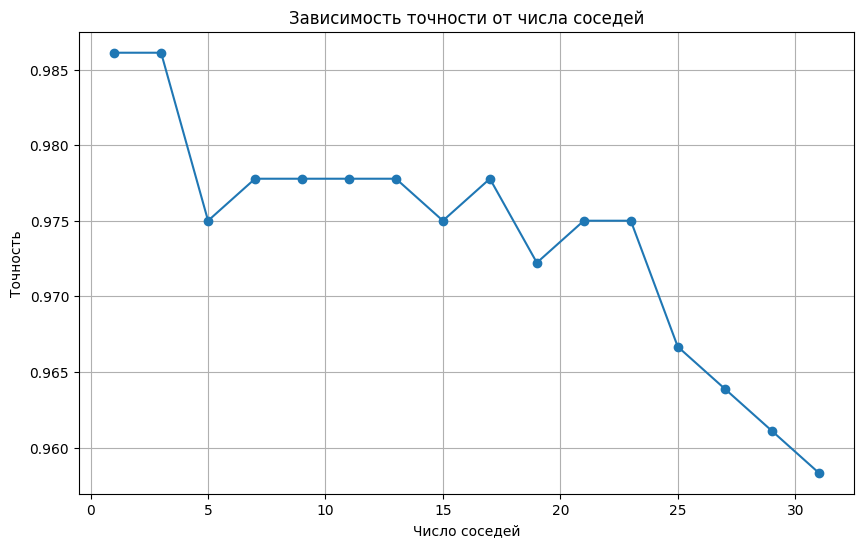

In [12]:
#Подсчет точности для различных значений числа соседей и построение графика
list_accuracy = list()
range_params_2 = (1, 33, 2)
for i in range(*range_params_2):
    list_accuracy.append(accuracy_score(y_test, classifier.predict(X_test, k=i)))

#Построение графика зависимости точности от числа соседей
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(list(range(*range_params_2)), list(list_accuracy), marker='o')
plt.title('Зависимость точности от числа соседей')
plt.xlabel('Число соседей')
plt.ylabel('Точность')
plt.grid(True)

### 1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


Значение k, при котором достигается наилучшая средняя точность = 1


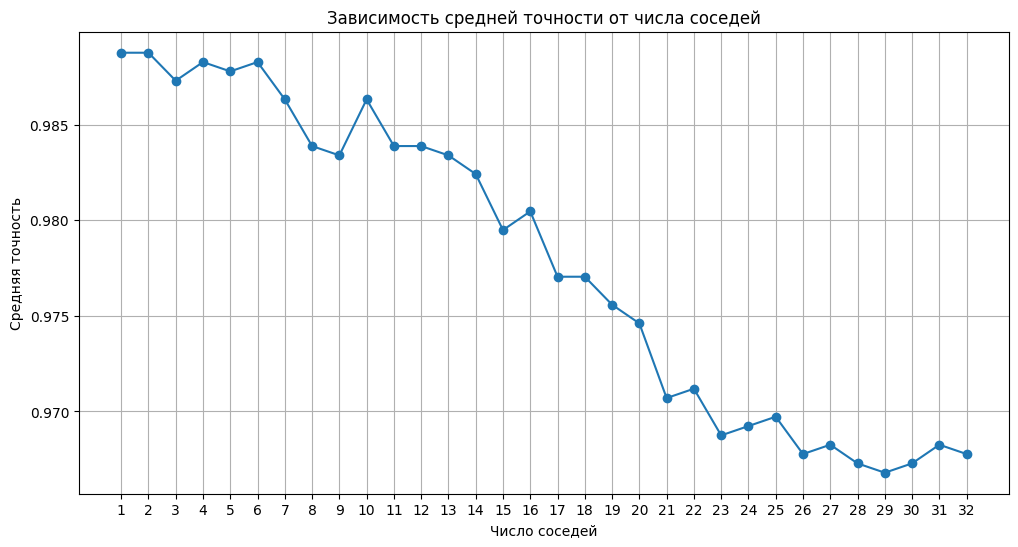

In [13]:
#Подсчет средней точности с использованием кросс-валидации и построение графика
range_params_1 = (1, 33, 1)
list_mean_accuracy = list()
for k in range (*range_params_1):
    scores = list()

    kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=_random_state)

    for i, (train_index, test_index) in enumerate(kf.split(digits.data, digits.target)):
        X_train, X_test = digits.data[train_index], digits.data[test_index]
        y_train, y_test = digits.target[train_index], digits.target[test_index]

        #classifier = KNearestNeighbor()
        classifier.train(X_train, y_train)

        preds = classifier.predict(X_test, k)
        acc = accuracy_score(y_test, preds)
        scores.append(acc)
    #Для каждого значения k (число соседей) вычисляем среднюю точность и добавляем в список
    list_mean_accuracy.append(np.mean(scores, dtype="float16"))

#Строим график кросс-валидации
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(list(range(*range_params_1)), list_mean_accuracy, marker='o')
plt.title('Зависимость средней точности от числа соседей')
plt.xlabel("Число соседей")
plt.ylabel("Средняя точность")
plt.xticks(range(*range_params_1))
plt.grid(True)
print(f"Значение k, при котором достигается наилучшая средняя точность = {range(*range_params_1)[np.argmax(list_mean_accuracy)]}")

### 1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.

In [14]:
#Получение предсказаний меток для тестовых данных с использованием одного ближайшего соседа
preds = classifier.predict(X_test, 1)

#Вывод метрик оценки качества классификации
print(f'Accuracy: {accuracy_score(y_test, preds)}')
print(f'Precision: {precision_score(y_test, preds, average = "macro")}')
print(f'Recall: {recall_score(y_test, preds, average = "macro")}')
print(f'F1: {f1_score(y_test, preds, average = "macro")}')

Accuracy: 0.9888641425389755
Precision: 0.9891578701412943
Recall: 0.9887373737373737
F1: 0.9888030476805569


### 1.11 Сделайте выводы по результатам 1 части задания.

В 1 части задания был реализован классификатор на основе метода k ближайших соседей, который на заданном наборе данных показывает достаточно хорошую точность: примерно от 0.9644 до 0.9889%. Точность зависит от двух гиперпараметров: числа соседей k и числа циклов num_loops. Для анализа зависимости от параметра k была вычислена кросс-валидация. При n=0 наилучшее значение для k равно 1 или 2.

## 2.  Классификация данных методом опорных векторов (SVM)

### 2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [15]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=_random_state, shuffle=True)

# Разделение тестовой выборки на валидационную и тестовую выборки
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=_random_state, shuffle=True)

print(f'Размер обучающей выборки признаков: {X_train.shape}')
print(f'Размер обучающей выборки меток: {y_train.shape}')
print(f'Размер валидационной выборки признаков: {X_validate.shape}')
print(f'Размер валидационной выборки меток: {y_validate.shape}')
print(f'Размер тестовой выборки признаков: {X_test.shape}')
print(f'Размер тестовой выборки меток: {y_test.shape}')

Размер обучающей выборки признаков: (1257, 64)
Размер обучающей выборки меток: (1257,)
Размер валидационной выборки признаков: (270, 64)
Размер валидационной выборки меток: (270,)
Размер тестовой выборки признаков: (270, 64)
Размер тестовой выборки меток: (270,)


### 2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

In [16]:
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_validate -= mean_image
X_test -= mean_image

### 2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнительную размерность к массиву данных и заполните ее 1.

In [17]:
# Добавление дополнительной размерности к массиву данных и заполнение её единицами
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_validate = np.hstack([X_validate, np.ones((X_validate.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# Вывод размерности данных после добавления столбца единиц
print(X_train.shape, X_validate.shape, X_test.shape)

(1257, 65) (270, 65) (270, 65)


### 2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py

In [18]:
#from builtins import range
#import numpy as np
#from random import shuffle
#from past.builtins import xrange

def svm_loss_naive(W, X, y, reg):
    """
    Structured SVM loss function, naive implementation (with loops).

    Inputs have dimension D, there are C classes, and we operate on minibatches
    of N examples.

    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    dW = np.zeros(W.shape) # initialize the gradient as zero

    # compute the loss and the gradient
    num_classes = W.shape[1]
    num_train = X.shape[0]
    loss = 0.0
    for i in range(num_train):
        scores = X[i].dot(W)
        correct_class_score = scores[y[i]]
        for j in range(num_classes):
            if j == y[i]:
                continue
            margin = scores[j] - correct_class_score + 1 # note delta = 1
            if margin > 0:
                loss += margin
                dW[:, j] += X[i]
                dW[:, y[i]] -= X[i]

    # Right now the loss is a sum over all training examples, but we want it
    # to be an average instead so we divide by num_train.
    loss /= num_train

    # Add regularization to the loss.
    loss += reg * np.sum(W * W)

    #############################################################################
    # TODO:                                                                     #
    # Compute the gradient of the loss function and store it dW.                #
    # Rather than first computing the loss and then computing the derivative,   #
    # it may be simpler to compute the derivative at the same time that the     #
    # loss is being computed. As a result you may need to modify some of the    #
    # code above to compute the gradient.                                       #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    dW /= num_train
    dW += reg * W
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    return loss, dW



def svm_loss_vectorized(W, X, y, reg):
    """
    Structured SVM loss function, vectorized implementation.

    Inputs and outputs are the same as svm_loss_naive.
    """
    loss = 0.0
    dW = np.zeros(W.shape) # initialize the gradient as zero

    #############################################################################
    # TODO:                                                                     #
    # Implement a vectorized version of the structured SVM loss, storing the    #
    # result in loss.                                                           #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    scores = X.dot(W)
    #Фиксация классов-ответов на конкретных изображениях
    correct_label_score_idxes = (range(scores.shape[0]), y)
    correct_label_scores = scores[correct_label_score_idxes]
    #Вычисление ошибки
    scores_diff = scores - np.reshape(correct_label_scores, (-1, 1)) + 1
    #Простановка нулей в нужных классах
    scores_diff[correct_label_score_idxes] = 0
    scores_diff[np.nonzero(scores_diff < 0)] = 0
    #Усреднённая ошибка
    loss = scores_diff.sum()
    num_train = X.shape[0]
    loss /= num_train
    #Регуляризация
    loss += 0.5 * reg * np.sum(W * W)
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    #############################################################################
    # TODO:                                                                     #
    # Implement a vectorized version of the gradient for the structured SVM     #
    # loss, storing the result in dW.                                           #
    #                                                                           #
    # Hint: Instead of computing the gradient from scratch, it may be easier    #
    # to reuse some of the intermediate values that you used to compute the     #
    # loss.                                                                     #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    #Градиент
    scores_diff[scores_diff > 0] = 1
    correct_label_vals = scores_diff.sum(axis=1) * -1
    scores_diff[correct_label_score_idxes] = correct_label_vals
    dW = X.T.dot(scores_diff)
    dW /= num_train
    dW += reg * W
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW


In [19]:
W = np.random.randn(65, 10) * 0.0001 #Матрица весов для тестирования
regularization_param = 0.000005
loss, grad = svm_loss_naive(W, X_train, y_train, regularization_param)
print('loss: %f' % (loss, ))

loss: 9.005734


### 2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [20]:
def grad_check_sparse(f, x, analytic_grad, num_checks=10, h=1e-5):
    """
    sample a few random elements and only return numerical
    in this dimensions.
    """

    for i in range(num_checks):
        ix = tuple([randrange(m) for m in x.shape])

        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evaluate f(x + h)
        x[ix] = oldval - h # increment by h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # reset

        grad_numerical = (fxph - fxmh) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = (abs(grad_numerical - grad_analytic) /
                    (abs(grad_numerical) + abs(grad_analytic)))
        print('numerical: %f analytic: %f, relative error: %e'
              %(grad_numerical, grad_analytic, rel_error))

In [21]:
loss, grad = svm_loss_naive(W, X_test, y_test, 0.0)
f = lambda w: svm_loss_naive(w, X_test, y_test, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

loss, grad = svm_loss_naive(W, X_test, y_test, 5e1)
f = lambda w: svm_loss_naive(w, X_test, y_test, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -4.126191 analytic: -4.126191, relative error: 1.147345e-10
numerical: 7.986856 analytic: 7.986856, relative error: 1.032855e-11
numerical: 4.693948 analytic: 4.693948, relative error: 4.199982e-11
numerical: 0.449527 analytic: 0.449527, relative error: 3.186183e-10
numerical: -0.037037 analytic: -0.037037, relative error: 5.962448e-10
numerical: -1.709007 analytic: -1.709007, relative error: 8.439374e-11
numerical: 0.077846 analytic: 0.077846, relative error: 3.656945e-10
numerical: -2.651486 analytic: -2.651486, relative error: 1.463584e-11
numerical: -3.539945 analytic: -3.539945, relative error: 4.130922e-11
numerical: 0.000530 analytic: 0.000530, relative error: 8.467253e-07
numerical: 0.844606 analytic: 0.848229, relative error: 2.140165e-03
numerical: -0.013724 analytic: -0.006862, relative error: 3.333333e-01
numerical: 1.249979 analytic: 1.247607, relative error: 9.499113e-04
numerical: 5.805158 analytic: 5.797408, relative error: 6.679388e-04
numerical: 0.377414 an

### 2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [22]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_test, y_test, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_test, y_test, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.011001s
Vectorized loss and gradient: computed in 0.205003s
difference: 0.000000


### 2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [23]:
class LinearClassifier(object):

    def __init__(self):
        self.W = None

    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100,
              batch_size=200, verbose=False):
        """
        Train this linear classifier using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.
        - y: A numpy array of shape (N,) containing training labels; y[i] = c
          means that X[i] has label 0 <= c < C for C classes.
        - learning_rate: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing
        - batch_size: (integer) number of training examples to use at each step.
        - verbose: (boolean) If true, print progress during optimization.

        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
        num_train, dim = X.shape
        num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
        if self.W is None:
            # lazily initialize W
            self.W = 0.001 * np.random.randn(dim, num_classes)

        # Run stochastic gradient descent to optimize W
        loss_history = []
        for it in range(num_iters):
            #########################################################################
            # TODO:                                                                 #
            # Sample batch_size elements from the training data and their           #
            # corresponding labels to use in this round of gradient descent.        #
            # Store the data in X_batch and their corresponding labels in           #
            # y_batch; after sampling X_batch should have shape (batch_size, dim)   #
            # and y_batch should have shape (batch_size,)                           #
            #                                                                       #
            # Hint: Use np.random.choice to generate indices. Sampling with         #
            # replacement is faster than sampling without replacement.              #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            batch_idxes = np.random.choice(num_train, batch_size, replace=True)
            X_batch = X[batch_idxes, :]
            y_batch = y[batch_idxes]
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            # evaluate loss and gradient
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            # perform parameter update
            #########################################################################
            # TODO:                                                                 #
            # Update the weights using the gradient and the learning rate.          #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            self.W -= learning_rate * grad
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

        return loss_history

    def predict(self, X):
        """
        Use the trained weights of this linear classifier to predict labels for
        data points.

        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.

        Returns:
        - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
          array of length N, and each element is an integer giving the predicted
          class.
        """
        ###########################################################################
        # TODO:                                                                   #
        # Implement this method. Store the predicted labels in y_pred.            #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        class_preds = X.dot(self.W)
        y_pred = class_preds.argmax(axis=1)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return y_pred

    def loss(self, X_batch, y_batch, reg):
        """
        Compute the loss function and its derivative.
        Subclasses will override this.

        Inputs:
        - X_batch: A numpy array of shape (N, D) containing a minibatch of N
          data points; each point has dimension D.
        - y_batch: A numpy array of shape (N,) containing labels for the minibatch.
        - reg: (float) regularization strength.

        Returns: A tuple containing:
        - loss as a single float
        - gradient with respect to self.W; an array of the same shape as W
        """
        pass


class LinearSVM(LinearClassifier):
    """ A subclass that uses the Multiclass SVM loss function """

    def loss(self, X_batch, y_batch, reg):
        return svm_loss_vectorized(self.W, X_batch, y_batch, reg)


class Softmax(LinearClassifier):
    """ A subclass that uses the Softmax + Cross-entropy loss function """

    def loss(self, X_batch, y_batch, reg):
        return softmax_loss_vectorized(self.W, X_batch, y_batch, reg)


In [24]:
svm = LinearSVM()
tic = time.time() #Фиксация времени до начала обучения
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time() #Фиксация времени после завершения обучения
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 16.953870
iteration 100 / 1500: loss 13.840076
iteration 200 / 1500: loss 11.889875
iteration 300 / 1500: loss 10.678204
iteration 400 / 1500: loss 9.988593
iteration 500 / 1500: loss 9.561653
iteration 600 / 1500: loss 9.314233
iteration 700 / 1500: loss 9.133815
iteration 800 / 1500: loss 9.049171
iteration 900 / 1500: loss 8.989218
iteration 1000 / 1500: loss 8.966462
iteration 1100 / 1500: loss 8.926057
iteration 1200 / 1500: loss 8.916201
iteration 1300 / 1500: loss 8.910732
iteration 1400 / 1500: loss 8.908189
That took 0.472062s


In [25]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_validate_pred = svm.predict(X_validate)
print('validation accuracy: %f' % (np.mean(y_validate == y_validate_pred), ))

training accuracy: 0.878282
validation accuracy: 0.859259


### 2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [26]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

y_validate_pred_max = 0
lr_best = 0
reg_best = 0

np.random.seed(_random_state)
svm = LinearSVM()

for lr in learning_rates:
    for rs in regularization_strengths:
        svm.train(X_train, y_train, learning_rate=lr, reg=rs, num_iters=1500, verbose=False)
        #Предсказание для валидационного набора данных
        y_validate_pred = svm.predict(X_validate)
        #Проверка точности
        if ((np.mean(y_validate == y_validate_pred)) > y_validate_pred_max):
            lr_best = lr
            reg_best = rs
            y_validate_pred_max = (np.mean(y_validate == y_validate_pred))
        print(f'lr = {lr}, rs = {rs}, accuracy = {(np.mean(y_validate == y_validate_pred))}')

#Вывод значений наилучшей точности и соответствующих значений lr и rs
print(f'Best accuracy: {y_validate_pred_max}. lr: {lr_best} , rs: {reg_best}')

lr = 1e-07, rs = 25000.0, accuracy = 0.8629629629629629
lr = 1e-07, rs = 50000.0, accuracy = 0.8592592592592593
lr = 5e-05, rs = 25000.0, accuracy = 0.8111111111111111


C:\Users\artdesert\AppData\Local\Temp\ipykernel_5440\287058387.py:95: RuntimeWarning: overflow encountered in scalar multiply
  loss += 0.5 * reg * np.sum(W * W)
C:\Users\artdesert\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\artdesert\AppData\Local\Temp\ipykernel_5440\287058387.py:95: RuntimeWarning: overflow encountered in multiply
  loss += 0.5 * reg * np.sum(W * W)


lr = 5e-05, rs = 50000.0, accuracy = 0.7333333333333333
Best accuracy: 0.8629629629629629. lr: 1e-07 , rs: 25000.0


### 2.9 Сделайте выводы по второй части задания

Во 2 части задания был реализован классификатор на основе метода опорных векторов (SVM). На текущем наборе данных этот метод показывает не самую приемлемую точность: примерно 80%. Точность зависит от двух гиперпараметров: коэффициента обучения learning_rate и параметра регуляризации regularization_strengths.
Отметим, что наилучшая точность варьируется от запуска к запуску в силу случайной генерации матрицы весов.
Найдены наилучшие значения learning_rate = 5e-05, reg = 25000.0. Метод kNN показал лучше точность и лучшую устойчивость к изменению гиперпараметров, по сравнению с методом SVM.